In [74]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt

In [112]:
# Read in the data and reduce it to only city demographics
cali_data = pd.read_csv("data/cali_combined.csv")
cali_data.rename(columns={"Unnamed: 0":"city_id"}, inplace=True)

# Being lazy and just filling in NAs for race columnswith the mean of the data
race_data = cali_data[['share_white', 'share_black',
       'share_native_american', 'share_asian', 'share_hispanic']]
race_data.fillna(race_data.mean(), inplace=True)
race_data.isna().sum()

Index(['city_id', 'id', 'name', 'date', 'manner_of_death', 'armed', 'age',
       'gender', 'race', 'city', 'state', 'signs_of_mental_illness',
       'threat_level', 'flee', 'body_camera', 'longitude', 'latitude',
       'is_geocoding_exact', 'Geographic Area', 'Median Income',
       'percent_completed_hs', 'poverty_rate', 'share_white', 'share_black',
       'share_native_american', 'share_asian', 'share_hispanic'],
      dtype='object')

In [96]:
# Simplify the race information
majority = []
# 0 = black
# 1 = native american
# 2 = asian
# 3 = hispanic
# 4 = white
for index, row in race_data.iterrows():
    if (row['share_black'] >= 50):
        majority.append(0)
    elif (row['share_native_american'] >= 50):
        majority.append(1)
    elif (row['share_asian'] >= 50):
        majority.append(2)
    elif (row['share_hispanic'] >= 50):
        majority.append(3)
    else:
        majority.append(4)

cities = cali_data[['Median Income',
       'percent_completed_hs', 'poverty_rate']]
cities["majority"] = majority
cities.head()

,Median Income,percent_completed_hs,poverty_rate,majority
0,81294.0,87.0,13.2,4
1,44797.0,74.9,25.3,4
2,43552.0,52.4,20.0,3
3,67364.0,85.6,13.2,4
4,105355.0,92.3,6.1,2


In [97]:
# Being lazy and just filling in NAs with the median of the data
cities.fillna(cities.median(), inplace=True)
cities.isna().sum()

Median Income           0
percent_completed_hs    0
poverty_rate            0
majority                0
dtype: int64

In [99]:
# Ok let's get into the ML part...
data = np.array(cities)
kmeans = KMeans(n_clusters=3)
kmeans.fit(data)

KMeans(n_clusters=3)

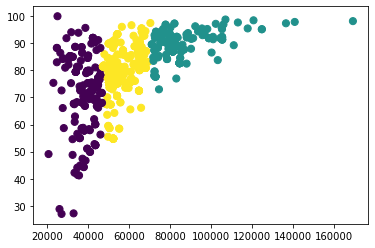

In [100]:
prediction = kmeans.predict(data)

# Just comparing two colunns of data here
plt.scatter(data[:, 0], data[:, 1], c=prediction, s=50, cmap='viridis')
plt.show()

In [101]:
# To look at all four columns, need to use PCA
pca = PCA(n_components=2)
output = pca.fit_transform(data)
output_df = pd.DataFrame(output)
output_df.columns = ["x","y"]
output_df["prediction"] = prediction

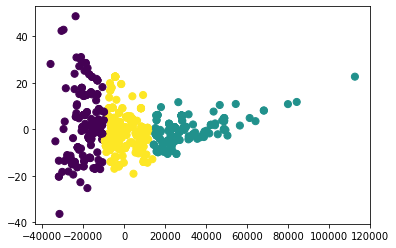

In [102]:
plt.scatter(output_df["x"], output_df["y"], c=output_df["prediction"], s=50, cmap='viridis')
plt.show()

### City data was too continuous...let's throw more columns at it!

In [109]:
# Get more attributes/features/columns to look at
moreAtts = cali_data[['manner_of_death', 'armed', 'age',
       'gender', 'race', 'signs_of_mental_illness',
       'threat_level', 'flee', 'body_camera']]
allAtts = pd.concat([moreAtts,cities], axis=1)
allAtts.isna().sum()

manner_of_death              0
armed                       28
age                         63
gender                       0
race                       104
signs_of_mental_illness      0
threat_level                 0
flee                        50
body_camera                  0
Median Income                0
percent_completed_hs         0
poverty_rate                 0
majority                     0
dtype: int64

In [110]:
# Take care of those NAs
allAtts["age"].fillna(allAtts["age"].median(),inplace=True)